In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#again the plot size
sns.set(rc={'figure.figsize':(10,8)})
#chanage the bgcolor to white
sns.set_style("white")
#make the legend and axis text a bit bigger
sns.set_context("poster")
#remove the axis splines
sns.despine()

<Figure size 720x576 with 0 Axes>

In [3]:
letter_frequency_dict = {'E' : 12.0,'T' : 9.10,'A' : 8.12,'O' : 7.68,'I' : 7.31,'N' : 6.95,'S' : 6.28,'R' : 6.02,'H' : 5.92,'D' : 4.32,'L' : 3.98,'U' : 2.88,'C' : 2.71,'M' : 2.61,'F' : 2.30,'Y' : 2.11,'W' : 2.09,'G' : 2.03,'P' : 1.82,'B' : 1.49,'V' : 1.11,'K' : 0.69,'X' : 0.17,'Q' : 0.11,'J' : 0.10,'Z' : 0.07 }

In [4]:
letter_frequency_df = pd.DataFrame(letter_frequency_dict.items(), columns=['letter', 'frequency'])

In [5]:
letter_frequency_df['frequency'] = pd.to_numeric(letter_frequency_df['frequency'])
letter_frequency_df['letter'] = letter_frequency_df['letter'].str.lower()

In [6]:
letter_frequency_df.head()

,letter,frequency
0,e,12.00
1,t,9.10
2,a,8.12
3,o,7.68
4,i,7.31


In [7]:
#reading data from the txt file
names_df = pd.read_csv('nationalities.txt', header=None, names=["nationality"])

In [8]:
virus = pd.DataFrame(['corona'], columns = ['nationality'])
names_df = pd.concat([virus, names_df], ignore_index = True)
names_df['nationality'] = names_df['nationality'].str.lower() + " virus"

In [9]:
names_df.head()

,nationality
0,corona virus
1,afghan virus
2,albanian virus
3,algerian virus
4,american virus


In [10]:
def compute_possibility(name):
    name = name.replace(' ', '')
    cumulative_frequency = 0
    for c in name:
        frequency = float(letter_frequency_df['frequency'].loc[letter_frequency_df['letter'] == c])
        #print(str(c)+' '+str(frequency))
        cumulative_frequency = cumulative_frequency + frequency
        word_frequency = cumulative_frequency / len(name)
    return word_frequency

In [11]:
print(compute_possibility('corona virus')-compute_possibility('chinese virus'))
print(compute_possibility('corona virus')-compute_possibility('us virus'))

-0.6920454545454549
1.0254545454545454


In [12]:
names_df['possibility'] = names_df['nationality'].apply(compute_possibility)

In [13]:
#names_df.head()

In [14]:
names_df = names_df.sort_values(by='possibility', ascending=False)

In [15]:
#names_df.head(10)

In [16]:
#names_df.tail(10)

In [17]:
letter_frequency_df = letter_frequency_df.sort_values(by='letter', ascending=True)

In [18]:
#letter_frequency_df.head()

In [19]:
def update_letter_frequency(letter_frequency_df, name):
    letter_frequency_df_copy = letter_frequency_df.copy()
    letter_frequency_df_copy['count'] = 0
    if name != '': 
        for c in name:
            letter_frequency_df_copy['frequency'].loc[letter_frequency_df_copy['letter'] == c] *= 1.4
            letter_frequency_df_copy['count'] += 1
        letter_frequency_df_copy['frequency'].loc[letter_frequency_df_copy['count'] == 0] *= 0.6
    return letter_frequency_df_copy

/Users/benstewart/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


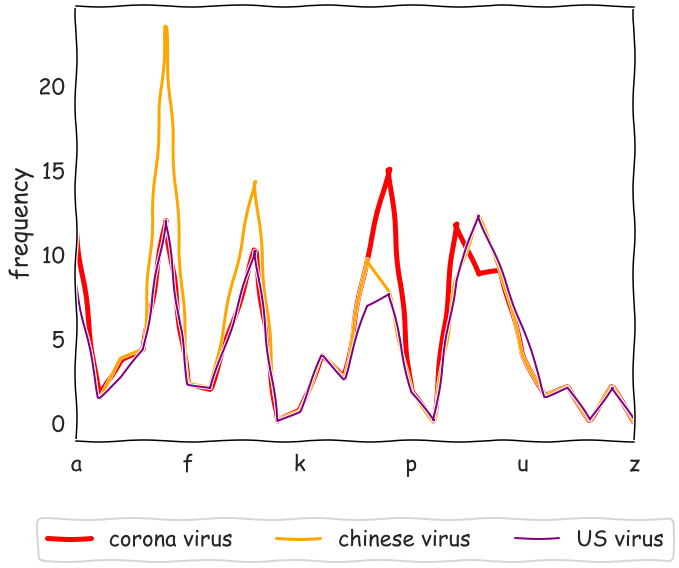

In [20]:
plt.xkcd()
plt.figure()
#plotting two line plots for deaths and recoveries respectively
ax = plt.gca()

labels = ['corona virus', 'chinese virus', 'US virus']
names = ['corona virus', 'chinese virus', 'us virus']
colors = ['red', 'orange', 'purple']
line_widths = [5,3,2]


for i in range(len(labels)):
    update_letter_frequency(letter_frequency_df,names[i]).plot(x = 'letter', y = 'frequency', label = labels[i], lw=line_widths[i], color = colors[i], ax=ax)
    
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, fancybox=True)
ax.set(xlabel='', ylabel='frequency')
plt.show()